In [ ]:
!yolo task=detect mode=predict model=/home/addinedu/runs/detect/train31/weights/best.pt source=/home/addinedu/Desktop/yolo/qtest/* save=true save_txt=true save_crop=True

In [ ]:
#학습 모델 위치 - model=/home/addinedu/runs/detect/train31/weights/best.pt 
#바운딩 박스 치고 바운딩 박스 영역만 저장 - 위치: /home/addinedu/runs/detect/predict33/crops/box
#크롭된 이미지 내에서 노란색이 차지하는 비율 구하기 

In [23]:
import numpy as np
import cv2


def get_limits(color):
    c = np.uint8([[color]])  # BGR values
    hsvC = cv2.cvtColor(c, cv2.COLOR_BGR2HSV)

    hue = hsvC[0][0][0]  # Get the hue value

    # Handle red hue wrap-around
    if hue >= 165:  # Upper limit for divided red hue
        lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
        upperLimit = np.array([180, 255, 255], dtype=np.uint8)
    elif hue <= 15:  # Lower limit for divided red hue
        lowerLimit = np.array([0, 100, 100], dtype=np.uint8)
        upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)
    else:
        lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
        upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)

    return lowerLimit, upperLimit

In [ ]:
import cv2
from PIL import Image


yellow = [0, 255, 255]  # BGR 색상 공간에서의 노란색

# 이미지 경로
image_path = "/home/addinedu/runs/detect/predict33/crops/box/captured_image_20240510164337.jpg"

# 이미지 읽기
frame = cv2.imread(image_path)

# HSV 색상으로 변환
hsvImage = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# 노란색의 범위 가져오기
lowerLimit, upperLimit = get_limits(color=yellow)

# 마스크 생성
mask = cv2.inRange(hsvImage, lowerLimit, upperLimit)

# 마스크를 이미지로 변환
mask_ = Image.fromarray(mask)

# 마스크 영역의 바운딩 박스 가져오기
bbox = mask_.getbbox()

# 바운딩 박스가 있으면 사각형 그리기
if bbox is not None:
    x1, y1, x2, y2 = bbox
    frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 5)

# 결과 표시
cv2.imshow('frame', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

yellow = [0, 255, 255]  # BGR 색상 공간에서의 노란색

# 이미지 경로
image_path = "/home/addinedu/runs/detect/predict33/crops/box/captured_image_20240510164337.jpg"

# 이미지 읽기
frame = cv2.imread(image_path)

# HSV 색상으로 변환
hsv_image = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# 노란색의 범위 가져오기
lower_limit = np.array([20, 100, 100])
upper_limit = np.array([30, 255, 255])

# 마스크 생성
mask = cv2.inRange(hsv_image, lower_limit, upper_limit)

# 마스크를 이미지로 변환
masked_image = cv2.bitwise_and(frame, frame, mask=mask)

# 이미지 출력
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [20]:
import cv2
import numpy as np

cam=cv2.VideoCapture(0)

while (1):
    im= "/home/addinedu/runs/detect/predict33/crops/box/captured_image_20240510164337.jpg"

    #converting video streamed frames to HSV. which we will learn further
    hsv=cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
    
    #Red Color
    red_light=np.array([165,87,111],np.uint8)
    red_dark=np.array([180,255,255],np.uint8)
    
    #Blue Color
    blue_light=np.array([99,115,150],np.uint8)
    blue_dark=np.array([120,255,255],np.uint8)
    
    #Yellow Color
    yellow_light=np.array([55,60,200],np.uint8)
    yellow_dark=np.array([60,255,255],np.uint8)
    
    #Green Color
    green_light=np.array([65, 50, 50],np.uint8)
    green_dark=np.array([77,255,255],np.uint8)
    
    #Range Specification
    red=cv2.inRange(hsv,red_light,red_dark)
    blue=cv2.inRange(hsv,blue_light,blue_dark)
    yellow=cv2.inRange(hsv,yellow_light,yellow_dark)
    green=cv2.inRange(hsv,green_light,green_dark)
    
    #Morphological Transformation using dilation
    kernel=np.ones((15,15),"uint8")
    
    red=cv2.dilate(red,kernel)
    res_red = cv2.bitwise_and(im,im, mask=red)
    
    blue=cv2.dilate(blue,kernel)
    res_blue = cv2.bitwise_and(im,im, mask=blue)
        
    yellow=cv2.dilate(yellow,kernel)    
    res_yellow = cv2.bitwise_and(im,im, mask=yellow)
    
    green=cv2.dilate(green,kernel)
    res_green = cv2.bitwise_and(im,im, mask=green)
    
    #Tracking Red | Contour is used to recognize colored object in a video feed., hierarchy sets the ek ke andar ek wala thing for objects in a feed which is 2D
    #enumerate fn: https://www.geeksforgeeks.org/enumerate-in-python/
    (_,contours,hierarchy)=cv2.findContours(red,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    for _,contour in enumerate(contours):
        area=cv2.contourArea(contour)
        if area>300:
            x,y,w,h=cv2.boundingRect(contour)
            cnt=contours[len(contours)-1]
            cv2.drawContours(im,cnt,-1,(0,0,255),3)
            cv2.putText(im,"Red",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255))
            
    #Tracking Blue
    (_,contours,hierarchy)=cv2.findContours(blue,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    for _,contour in enumerate(contours):
        area=cv2.contourArea(contour)
        if area>300:
            x,y,_,_=cv2.boundingRect(contour)
            cnt=contours[len(contours)-1]
            cv2.drawContours(im,cnt,-1,(255,0,0),2)
            cv2.putText(im,"Blue",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0))
            

   #Tracking Yellow
    (_,contours,hierarchy)=cv2.findContours(yellow,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    for _,contour in enumerate(contours):
        area=cv2.contourArea(contour)
        if area>300:
            x,y,w,h=cv2.boundingRect(contour)
            cnt=contours[len(contours)-1]
            cv2.drawContours(im,cnt,-1,(0,255,255),2)
            cv2.putText(im,"Yellow",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,255))
            
   #Tracking Green
    (_,contours,hierarchy)=cv2.findContours(green,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    for _,contour in enumerate(contours):
        area=cv2.contourArea(contour)
        if area>300:
            x,y,w,h=cv2.boundingRect(contour)
            cnt=contours[len(contours)-1]
            cv2.drawContours(im,cnt,-1,(0,255,0),2)
            cv2.putText(im,"Green",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0))
        
    blur=cv2.medianBlur(res_blue,15)
    cv2.imshow("Blur",blur)
    cv2.imshow("Color Tracker",im)
    cv2.imshow("mask",res_blue)
    #cv2.imshow("median_red",median1)
    if cv2.waitKey(33)==27 and 0xFF!= ord('q'):
        break
        
cam.release()
cv2.destroyAllWindows()

[ WARN:0@1191.629] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@1191.629] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


주요 색상:
[191 194 213]
[19 17 15]
[211 105 106]
[158 156 170]
[239 194  68]
[118  48  48]
[201  87  83]
[130 123 133]
[171 175 193]
[42 36 33]
[185 149  74]
[186 154 146]
[205 209 226]
[193 107 107]
[243 204  98]
[205  96  93]
[34 24 22]
[81 29 28]
[144 139 150]
[154 107 101]
[188 124 126]
[174  77  75]
[199 178 167]
[162 166 184]
[182 185 203]
[11 10  8]
[214 174  77]
[182  94  93]
[139  73  68]
[209 116 118]


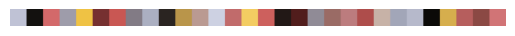

In [3]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

def extract_main_colors(image_path, num_colors=30):
    # 이미지 로드
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 이미지를 1차원 배열로 변환
    pixels = image.reshape(-1, 3)
    
    # K-means 군집화 알고리즘을 사용하여 주요 색상 추출
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    
    # 클러스터 중심 색상 추출
    main_colors = kmeans.cluster_centers_.astype(np.uint8)
    
    return main_colors

# 이미지 경로
image_path = "/home/addinedu/runs/detect/predict33/crops/box/captured_image_20240510164337.jpg"

# 주요 색상 추출
main_colors = extract_main_colors(image_path)

# 추출된 주요 색상 출력
print("주요 색상:")
for color in main_colors:
    print(color)
import matplotlib.pyplot as plt

def display_color_palette(colors):
    # 팔레트 생성
    palette = np.zeros((50, len(colors) * 50, 3), dtype=np.uint8)
    for i, color in enumerate(colors):
        palette[:, i*50:(i+1)*50] = color
    
    # 팔레트 출력
    plt.imshow(palette)
    plt.axis('off')
    plt.show()

# 주요 색상 팔레트 출력
display_color_palette(main_colors)



In [19]:
import cv2
import numpy as np

def calculate_color_ratio(image_path, target_color):
    # 이미지를 RGB 형식으로 읽기
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 목표 색상을 Numpy 배열로 변환
    target_color = np.array(target_color)
    
    # 이미지에서 목표 색상과 가까운 픽셀 식별
    similar_pixels = np.all(np.isclose(image, target_color), axis=-1)
    
    # 목표 색상을 차지하는 비율 계산
    color_ratio = np.sum(similar_pixels) / similar_pixels.size * 100
    
    return color_ratio

# 테스트 이미지 경로
image_path = "/home/addinedu/runs/detect/predict33/crops/box/captured_image_20240510164337.jpg"

# 목표 색상
target_color = [239, 194,  68]

# 색상이 차지하는 비율 계산
color_ratio = calculate_color_ratio(image_path, target_color)

# 결과 출력
print("노란색이 차지하는 비율:", color_ratio)


노란색이 차지하는 비율: 0.0


In [16]:
import numpy as np

def find_similar_yellow_range(rgb_color, tolerance=20):
    # RGB 색상을 HSV 형식으로 변환
    hsv_color = cv2.cvtColor(np.uint8([[rgb_color]]), cv2.COLOR_RGB2HSV)[0][0]

    # 주어진 RGB 색상 주변의 노란색 범위 정의
    lower_yellow = np.array([hsv_color[0] - tolerance, 50, 50])
    upper_yellow = np.array([hsv_color[0] + tolerance, 255, 255])

    return lower_yellow, upper_yellow

# 주어진 RGB 색상
rgb_color = [246, 203, 75]

# 유사한 노란색 범위 찾기
lower_yellow, upper_yellow = find_similar_yellow_range(rgb_color)

# 결과 출력
print("유사한 노란색 범위:")
print("하한:", lower_yellow)
print("상한:", upper_yellow)


유사한 노란색 범위:
하한: [ 2 50 50]
상한: [ 42 255 255]
